<a href="https://colab.research.google.com/github/arbeeorlar/data_science/blob/main/Kmeans_with_tSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Libraries for scaling numerical features
from sklearn.preprocessing import StandardScaler

# to perform k-means clustering
from sklearn.cluster import KMeans

# to perform silhouette analysis
from sklearn.metrics import silhouette_score

# to perform t-SNE
from sklearn.manifold import TSNE

from sklearn import preprocessing

# to define a common seed value to be used throughout
RS=0

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
bank_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/banknote.csv')

In [ ]:
bank_df_copy = bank_df.copy()

In [ ]:
bank_df.head()

In [ ]:
bank_df.info()

In [ ]:
bank_df.describe().T

In [ ]:
bank_df.isnull().sum()

In [ ]:
bank_df[bank_df.duplicated()]

In [ ]:
bank_df.drop_duplicates(inplace=True)

In [ ]:
bank_df.duplicated().sum()

In [ ]:
features = bank_df.drop('class', axis=1)
target = bank_df['class']

In [ ]:
scaler = StandardScaler()
feature_scaled = pd.DataFrame(scaler.fit_transform(bank_df), columns=bank_df.columns)

In [ ]:
feature_scaled.head(5)

In [177]:
tsne = TSNE(n_components=2, n_jobs=2, random_state=RS)
tsne_features = tsne.fit_transform(feature_scaled)
tsne_features

array([[ 30.849676,   9.781704],
       [ 30.526196,  13.552144],
       [ -7.454701,  42.75222 ],
       ...,
       [-44.97679 ,  18.53027 ],
       [-44.04992 ,  10.699447],
       [-27.936604, -18.503153]], dtype=float32)

In [178]:
tsne_features = pd.DataFrame(tsne_features, columns=['Feature 1', 'Feature 2'])
tsne_features.head()

,Feature 1,Feature 2
0,30.849676,9.781704
1,30.526196,13.552144
2,-7.454701,42.752220
3,47.138733,-10.236024
4,-9.342687,32.418556


<Axes: xlabel='Feature 1', ylabel='Feature 2'>

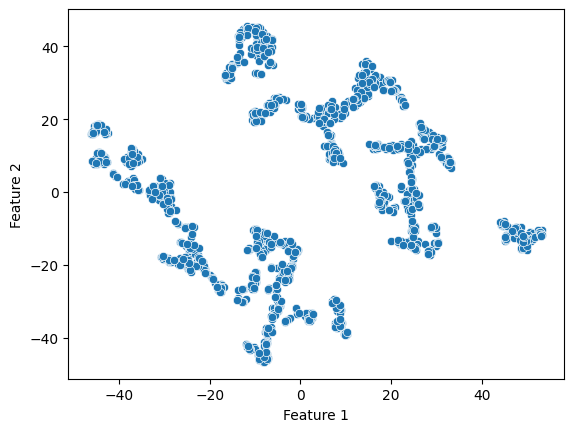

In [179]:
sns.scatterplot(x='Feature 1', y='Feature 2', data=tsne_features)

In [180]:
tsne3 = TSNE(n_components=3, n_jobs=2, random_state=RS)
tsne_features_3 = tsne3.fit_transform(feature_scaled)
tsne_features_3

array([[ 12.885549  ,   1.5653704 ,  -1.0923772 ],
       [ 12.190287  ,   1.4019718 ,  -3.6535275 ],
       [ -5.2257223 ,  13.568663  ,  -1.6942993 ],
       ...,
       [-12.966872  ,   4.4541464 ,  11.773947  ],
       [-15.180324  ,   2.3449352 ,   8.260415  ],
       [ -9.520681  ,  -5.681496  ,  -0.25092268]], dtype=float32)

In [181]:
tsne_features_3 = pd.DataFrame(tsne_features_3, columns=['Feature 1', 'Feature 2', 'Feature 3'])
tsne_features_3.head()

,Feature 1,Feature 2,Feature 3
0,12.885549,1.565370,-1.092377
1,12.190287,1.401972,-3.653527
2,-5.225722,13.568663,-1.694299
3,12.876740,-8.385383,1.603315
4,-4.328500,11.464274,3.371329


In [182]:
# plotting a 3D scatterplot
fig = px.scatter_3d(tsne_features_3, x='Feature 1', y='Feature 2', z='Feature 3')
fig.show()

In [183]:

k_means_4 = KMeans(n_clusters=4, random_state=RS)
k_means_4.fit(feature_scaled)

KMeans(n_clusters=4, random_state=0)

In [184]:
print(k_means_4.inertia_)

2254.171770205327


In [185]:
# Assigning cluster labels to the tsne_2d_data DataFrame
tsne_features['Clusters'] = k_means_4.labels_
tsne_features.head()

,Feature 1,Feature 2,Clusters
0,30.849676,9.781704,1
1,30.526196,13.552144,1
2,-7.454701,42.752220,2
3,47.138733,-10.236024,1
4,-9.342687,32.418556,2


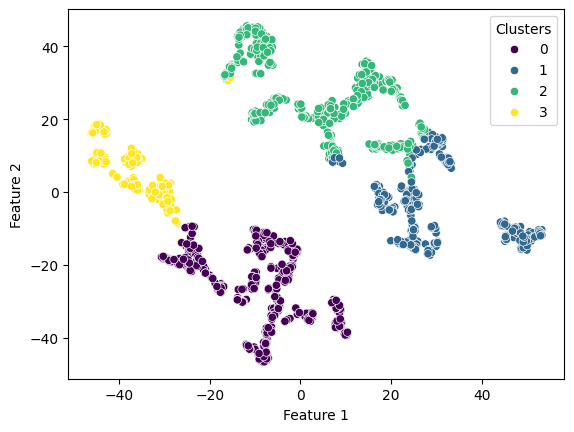

In [186]:
sns.scatterplot(tsne_features, x='Feature 1', y='Feature 2', hue='Clusters', palette='viridis');

In [187]:
tsne_features_3['Clusters'] = k_means_4.labels_
tsne_features_3.head()

,Feature 1,Feature 2,Feature 3,Clusters
0,12.885549,1.565370,-1.092377,1
1,12.190287,1.401972,-3.653527,1
2,-5.225722,13.568663,-1.694299,2
3,12.876740,-8.385383,1.603315,1
4,-4.328500,11.464274,3.371329,2


In [188]:
fig = px.scatter_3d(tsne_features_3, x='Feature 1', y='Feature 2', z='Feature 3', color='Clusters')
fig.show()

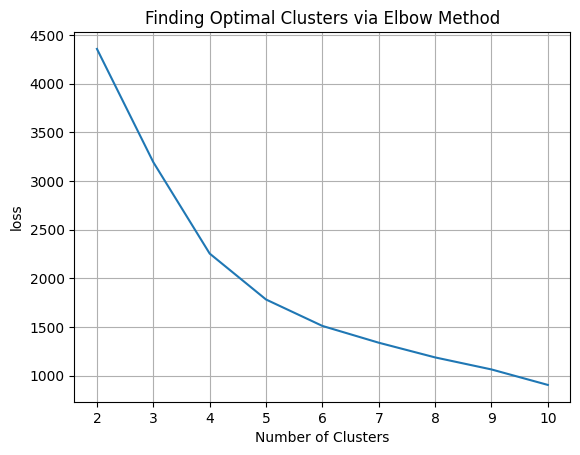

In [189]:
 # training KMeans on K values from 1 to 10
loss =[]
for i in range(2, 11):
  km=KMeans(n_clusters=i).fit(feature_scaled)
  loss.append(km.inertia_)


 #printing loss against number of clusters

plt.plot(range(2, 11), loss)
plt.title('Finding Optimal Clusters via Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('loss')
plt.grid(True)
plt.show()

In [190]:
k_means_3 = KMeans(n_clusters=3)
k_means_3.fit(feature_scaled)

KMeans(n_clusters=3)

In [191]:
tsne_features['Clusters'] = k_means_3.labels_
tsne_features.head()

,Feature 1,Feature 2,Clusters
0,30.849676,9.781704,0
1,30.526196,13.552144,0
2,-7.454701,42.752220,0
3,47.138733,-10.236024,2
4,-9.342687,32.418556,0


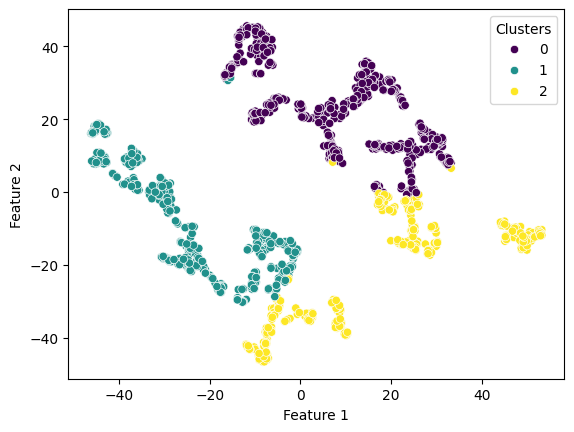

In [192]:
sns.scatterplot(tsne_features, x='Feature 1', y='Feature 2', hue='Clusters', palette='viridis');

In [193]:
tsne_features_3['Clusters'] = k_means_3.labels_
tsne_features_3.head()

,Feature 1,Feature 2,Feature 3,Clusters
0,12.885549,1.565370,-1.092377,0
1,12.190287,1.401972,-3.653527,0
2,-5.225722,13.568663,-1.694299,0
3,12.876740,-8.385383,1.603315,2
4,-4.328500,11.464274,3.371329,0


In [194]:
fig = px.scatter_3d(tsne_features_3, x='Feature 1', y='Feature 2', z='Feature 3', color='Clusters')
fig.show()

In [195]:
bank_df["Clusters"] = k_means_4.labels_
bank_df.head()

,variance,skewness,curtosis,entropy,class,Clusters
0,3.62160,8.6661,-2.8073,-0.44699,0,1
1,4.54590,8.1674,-2.4586,-1.46210,0,1
2,3.86600,-2.6383,1.9242,0.10645,0,2
3,3.45660,9.5228,-4.0112,-3.59440,0,1
4,0.32924,-4.4552,4.5718,-0.98880,0,2


Clusters
0    31.528190
2    31.454006
1    23.145401
3    13.872404
Name: proportion, dtype: float64 



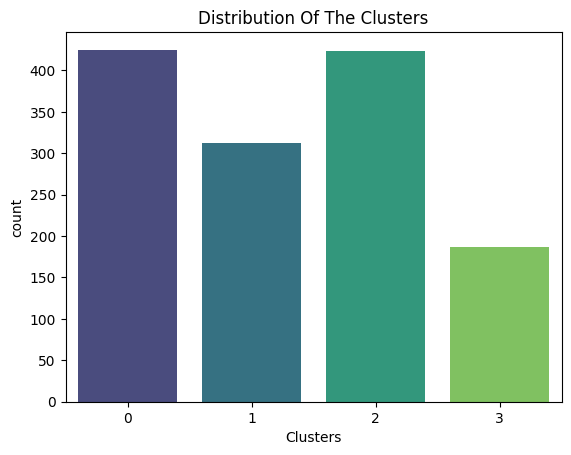

In [196]:
# checking the distribution of the categories in Clusters
print(100*bank_df['Clusters'].value_counts(normalize=True), '\n')

# plotting the count plot for clusters
sns.countplot(data=bank_df, x='Clusters', palette='viridis').set_title("Distribution Of The Clusters");

In [197]:
le = preprocessing.LabelEncoder()
label = le.fit_transform(target)

In [198]:
plt.scatter(features[:, 0], features[:, 1], c=label, cmap="rainbow", alpha=0.6, edgecolors='w')

InvalidIndexError: (slice(None, None, None), 0)